## load data

In [1]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

diamonds = pd.read_csv('/content/gdrive/MyDrive/data/diamonds.csv')
display(diamonds[:4])

Mounted at /content/gdrive


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


## reformat dataframe ( melt, gather )

In [ ]:
display(diamonds[:4])

# reformat dataframe ( melt )
diamonds_measurements = pd.melt(diamonds, value_vars=["x", "y", "z"], id_vars=["carat", "cut", "color", "clarity", "depth", "price"], var_name="measurement")
display(diamonds_measurements[:4])

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63


,carat,cut,color,clarity,depth,price,measurement,value
0,0.23,Ideal,E,SI2,61.5,326,x,3.95
1,0.21,Premium,E,SI1,59.8,326,x,3.89
2,0.23,Good,E,VS1,56.9,327,x,4.05
3,0.29,Premium,I,VS2,62.4,334,x,4.20


## matplotlib

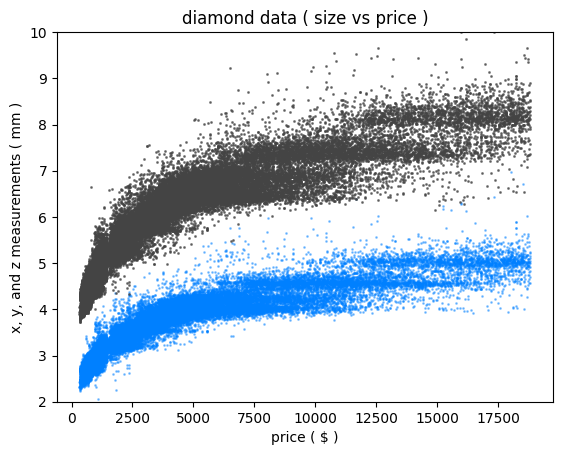

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(diamonds.price, diamonds.z, s=1, color="#0080ff", alpha=0.4)
plt.ylim([2, 10])
plt.xlabel("price ( $ )")
plt.ylabel("x, y, and z measurements ( mm )")
plt.title("diamond data ( size vs price )")
plt.scatter(diamonds.price, diamonds.x, s=1, color="#444", alpha=0.4)
plt.scatter(diamonds.price, diamonds.x, s=1, color="#444", alpha=0.4)

## plotnine

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:411: PlotnineWarning: geom_point : Removed 49 rows containing missing values.


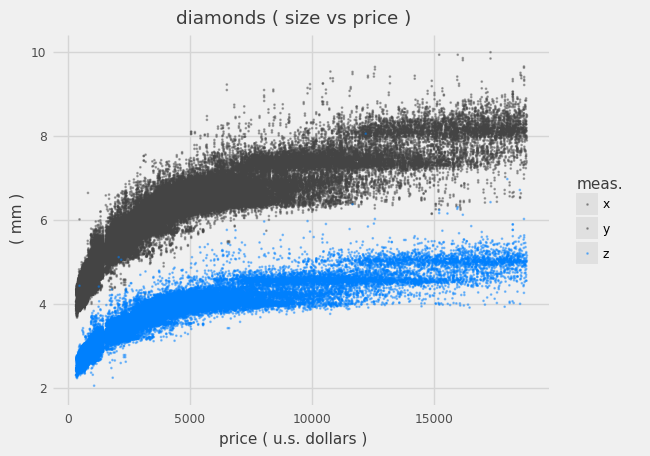

<ggplot: (8752810579509)>

In [ ]:
from plotnine.themes import theme_538 as theme
from plotnine.qplot import labs
from plotnine.scales.limits import lims
from plotnine import ggplot, aes, geom_point, scale_color_manual

p = (ggplot(diamonds_measurements)
    + aes(x="price", y="value", color="measurement")
    + geom_point(size=.1, alpha=0.4)
    + lims(y=(2, 10))
    + scale_color_manual(values = {"x": "#444444", "y": "#444444", "z": "#0080ff"})
    + labs(title="diamonds ( size vs price )", x="price ( u.s. dollars )", y="( mm )", color="meas.")
    + theme()
    )
p

## save image

In [ ]:
p.save(filename="/content/gdrive/MyDrive/data/plotnine_xkcd.png", height=6, width=8, units="in", dpi=300)

## correlation

In [22]:
data = diamonds[['carat', 'cut', 'x', 'y', 'z']]
data['x*z'] = data['z'] * data['x']
data.corr()

<ipython-input-22-e7c09680794a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-22-e7c09680794a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,carat,x,y,z,x*z
carat,1.000000,0.975094,0.951722,0.953387,0.987940
x,0.975094,1.000000,0.974701,0.970772,0.987459
y,0.951722,0.974701,1.000000,0.952006,0.966248
z,0.953387,0.970772,0.952006,1.000000,0.986833
x*z,0.987940,0.987459,0.966248,0.986833,1.000000


In [27]:
data[['carat', 'cut', 'x*z']].groupby('cut').corr()

carat       x*z
cut                                
Fair      carat  1.000000  0.987339
          x*z    0.987339  1.000000
Good      carat  1.000000  0.985481
          x*z    0.985481  1.000000
Ideal     carat  1.000000  0.993588
          x*z    0.993588  1.000000
Premium   carat  1.000000  0.987539
          x*z    0.987539  1.000000
Very Good carat  1.000000  0.980245
          x*z    0.980245  1.000000